In [ ]:
import os
import sys
import joblib
import pickle
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [26]:
df = pd.read_csv("../data/raw/house_prices.csv")

In [29]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,Average,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,Average,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,NaN,0,Average,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,Very Good,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,Average,8,1680,0,1987,0,1800,7503


In [30]:
drop_columns = ['id','date']

df.drop(columns=drop_columns,inplace=True)

In [31]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,N,0,Average,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,N,0,Average,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NaN,0,Average,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,N,0,Very Good,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,N,0,Average,8,1680,0,1987,0,1800,7503


In [32]:
df.isnull().sum()

price             864
bedrooms            0
bathrooms        2161
sqft_living         0
sqft_lot            0
floors              0
waterfront       3241
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [33]:
df.dropna(subset=['price'],inplace=True)

In [36]:
df.bathrooms.nunique()

29

<Axes: >

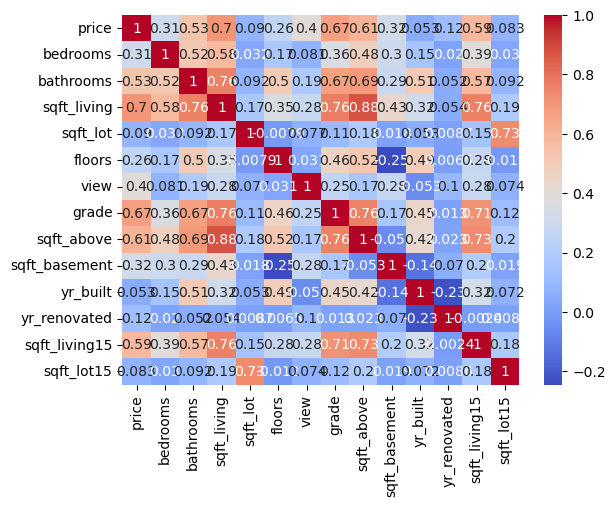

In [38]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)

In [40]:
imputer = KNNImputer()

columns = ['bathrooms','price','bedrooms','sqft_living','grade']

df[columns] = imputer.fit_transform(df[columns])


In [41]:
df.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       3109
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [42]:
df.waterfront.unique()

array(['N', nan, 'Y'], dtype=object)

In [43]:
df.waterfront.mode()[0]

'N'

In [44]:
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])

In [45]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20749 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20749 non-null  float64
 1   bedrooms       20749 non-null  float64
 2   bathrooms      20749 non-null  float64
 3   sqft_living    20749 non-null  float64
 4   sqft_lot       20749 non-null  int64  
 5   floors         20749 non-null  float64
 6   waterfront     20749 non-null  object 
 7   view           20749 non-null  int64  
 8   condition      20749 non-null  object 
 9   grade          20749 non-null  float64
 10  sqft_above     20749 non-null  int64  
 11  sqft_basement  20749 non-null  int64  
 12  yr_built       20749 non-null  int64  
 13  yr_renovated   20749 non-null  int64  
 14  sqft_living15  20749 non-null  int64  
 15  sqft_lot15     20749 non-null  int64  
dtypes: float64(6), int64(8), object(2)
memory usage: 2.7+ MB


In [49]:
encoder = LabelEncoder()

df['waterfront'] = encoder.fit_transform(df['waterfront'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20749 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20749 non-null  float64
 1   bedrooms       20749 non-null  float64
 2   bathrooms      20749 non-null  float64
 3   sqft_living    20749 non-null  float64
 4   sqft_lot       20749 non-null  int64  
 5   floors         20749 non-null  float64
 6   waterfront     20749 non-null  int32  
 7   view           20749 non-null  int64  
 8   condition      20749 non-null  object 
 9   grade          20749 non-null  float64
 10  sqft_above     20749 non-null  int64  
 11  sqft_basement  20749 non-null  int64  
 12  yr_built       20749 non-null  int64  
 13  yr_renovated   20749 non-null  int64  
 14  sqft_living15  20749 non-null  int64  
 15  sqft_lot15     20749 non-null  int64  
dtypes: float64(6), int32(1), int64(8), object(1)
memory usage: 2.6+ MB


In [51]:
df.condition.unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [52]:
df['condition'] = df['condition'].map({
    "Poor" : 0,
    "Fair" : 1,
    "Average" : 2,
    "Good" : 3,
    "Very Good" : 4
}).astype(int)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20749 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20749 non-null  float64
 1   bedrooms       20749 non-null  float64
 2   bathrooms      20749 non-null  float64
 3   sqft_living    20749 non-null  float64
 4   sqft_lot       20749 non-null  int64  
 5   floors         20749 non-null  float64
 6   waterfront     20749 non-null  int32  
 7   view           20749 non-null  int64  
 8   condition      20749 non-null  int32  
 9   grade          20749 non-null  float64
 10  sqft_above     20749 non-null  int64  
 11  sqft_basement  20749 non-null  int64  
 12  yr_built       20749 non-null  int64  
 13  yr_renovated   20749 non-null  int64  
 14  sqft_living15  20749 non-null  int64  
 15  sqft_lot15     20749 non-null  int64  
dtypes: float64(6), int32(2), int64(8)
memory usage: 2.5 MB


In [54]:
drop_columns = ['sqft_living15','sqft_lot15']

df.drop(columns=drop_columns,inplace=True)

In [56]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [57]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

In [59]:
scaler = StandardScaler()

In [66]:
X = df.drop(columns='price')
y = df['price']
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

models={
    'LinearRegression' : LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'RandomForest' : RandomForestRegressor(n_estimators=300,random_state=42),
    'XGB' : XGBRegressor(n_estimators=1000,random_state=42,learning_rate=0.01)
}

results = {}

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = root_mean_squared_error(y_test,y_pred)
    results[name] = {'MSE':mse, 'R2':r2, 'RMSE':rmse}

results


d:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.949e+13, tolerance: 2.208e+11
  model = cd_fast.enet_coordinate_descent(


{'LinearRegression': {'MSE': 50943948621.802925,
  'R2': 0.6476168834170519,
  'RMSE': 225707.66185888092},
 'Ridge': {'MSE': 50943745279.0769,
  'R2': 0.6476182899539512,
  'RMSE': 225707.21140246472},
 'Lasso': {'MSE': 50943890614.65732,
  'R2': 0.6476172846568322,
  'RMSE': 225707.5333582318},
 'RandomForest': {'MSE': 38805653748.21179,
  'R2': 0.7315783801850559,
  'RMSE': 196991.50679207413},
 'XGB': {'MSE': 37423241935.24901,
  'R2': 0.7411406264622207,
  'RMSE': 193450.87731837507}}